In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def create_dataset():
    data = {
        "dates": [
            "1982-01-01",
            "1986-09-07",
            "1989-12-31",
            "2001-12-31",
            "1990-12-11",
            "1990-03-01",
            "1961-07-31",
            "1969-03-17",
            "1994-09-01",
            "1993-09-23",
            "2004-08-11",
            "2019-03-05",
        ],
        "ADs": [
            "zimelidine",
            "fluoxetine",
            "citalopram",
            "escitalopram",
            "paroxetine",
            "sertraline",
            "amitriptyline",
            "nortriptyline",
            "mirtazapine",
            "venlafaxine",
            "duloxetine",
            "esketamine",
        ],
        "classes": [
            "SSRI",
            "SSRI",
            "SSRI",
            "SSRI",
            "SSRI",
            "SSRI",
            "Tricyclic",
            "Tricyclic",
            "Other",
            "Other",
            "Other",
            "Esketamine",
        ],
    }
    df = pd.DataFrame(data)
    # Convert 'dates' to datetime, extract the year, and convert to integer
    df["dates"] = pd.to_datetime(df["dates"]).dt.year.astype(int)

    # Sort DataFrame by 'dates'
    df_sorted = df.sort_values(by="dates")

    return df_sorted


df_sorted = create_dataset()

In [15]:
df_sorted

,dates,ADs,classes
6,1961,amitriptyline,Tricyclic
7,1969,nortriptyline,Tricyclic
0,1982,zimelidine,SSRI
1,1986,fluoxetine,SSRI
2,1989,citalopram,SSRI
4,1990,paroxetine,SSRI
5,1990,sertraline,SSRI
9,1993,venlafaxine,Other
8,1994,mirtazapine,Other
3,2001,escitalopram,SSRI


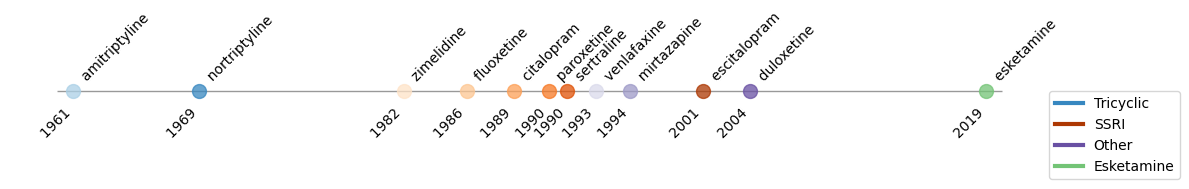

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class TimelinePlotter:
    def __init__(self, df, min_distance=1.2):
        self.df_sorted = df.sort_values(by="dates")
        self.min_distance = min_distance
        self.create_color_palette()

    def create_color_palette(self):
        # Get unique classes from the DataFrame
        unique_classes = self.df_sorted["classes"].unique()

        # Predefined color palettes
        palette_options = ["Blues", "Oranges", "Purples", "Greens", "Reds", "Greys"]

        self.palette = {}
        for i, cls in enumerate(unique_classes):
            # Cycle through the predefined palettes if there are more classes than palettes
            palette_name = palette_options[i % len(palette_options)]
            num_colors = self.df_sorted["classes"].value_counts().get(cls, 1)
            self.palette[cls] = sns.color_palette(palette_name, n_colors=num_colors)

        # Initialize a dictionary to keep track of the color index for each class
        color_index = {cls: 0 for cls in unique_classes}

        # Assign unique colors to each entry
        self.df_sorted["colors"] = self.df_sorted.apply(
            lambda row: self.assign_color(row, color_index), axis=1
        )

    def assign_color(self, row, color_index):
        cls = row["classes"]
        color = self.palette[cls][color_index[cls]]
        color_index[cls] = (color_index[cls] + 1) % len(self.palette[cls])
        return color

    def plot_timeline(self):
        plt.figure(figsize=(12, 2))
        plt.hlines(
            y=0,
            xmin=self.df_sorted["dates"].min() - 1,
            xmax=self.df_sorted["dates"].max() + 1,
            color="gray",
            alpha=0.8,
            linewidth=1,
        )

        # Dictionary to store year and its corresponding offset
        year_offsets = {}
        last_offset = None

        for _, row in self.df_sorted.iterrows():
            year, ad, color = row["dates"], row["ADs"], row["colors"]
            offset = year_offsets.get(
                year, year
            )  # Start with the actual year as the initial offset

            # Update offset to maintain minimum distance
            if last_offset is not None:
                while offset - last_offset < self.min_distance:
                    offset += self.min_distance

            # Store the updated offset
            year_offsets[year] = offset
            last_offset = offset

            # Plot the marker with the offset
            self.plot_marker(offset, year, ad, color)

        plt.grid(False)
        plt.axis("off")
        plt.xlabel("Year")
        plt.yticks([])

    def plot_marker(self, offset, year, ad, color):
        plt.plot(
            offset,
            0,
            marker="o",
            markersize=10,
            color=color,
            alpha=0.75,
            linestyle="None",
        )
        plt.text(
            offset,
            0.001,
            f"  {ad}",
            verticalalignment="bottom",
            rotation=45,
            horizontalalignment="left",
        )
        plt.text(
            offset,
            -0.01,
            f"  {year}",
            verticalalignment="top",
            rotation=45,
            horizontalalignment="right",
        )

    def create_legend(self):
        legend_handles = [
            plt.Line2D(
                [0],
                [0],
                color=self.palette[cls][-1],
                linewidth=3,
                linestyle="-",
                label=cls,
            )
            for cls in self.palette
        ]
        plt.legend(
            handles=legend_handles,
            bbox_to_anchor=(1.0, 0.5),
            loc="upper left",
            borderaxespad=0.0,
        )

    def show_plot(self):
        plt.tight_layout()
        plt.show()

    def save_plot(self, filename, dpi=300):
        plt.tight_layout()
        plt.savefig(filename, dpi=dpi)


# Create an instance of the TimelinePlotter class and use its methods
plotter = TimelinePlotter(df_sorted)
plotter.plot_timeline()
plotter.create_legend()
plotter.save_plot("../../writings/figures/timeline_approvals.png")
plotter.show_plot()